In [49]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
import os
import cv2

dir_that_contains_file = '/Users/el/Documents/projectpython2023/coba simbok/dataset/cacat'

os.chdir(dir_that_contains_file)

# img = cv2.imread('hasil_1.jpg')

[ WARN:0@1320.095] global loadsave.cpp:248 findDecoder imread_('hasil_1.jpg'): can't open/read file: check file path/integrity


In [58]:
test_img_path = dir_that_contains_file + "/hasil_1.png"
test_img_path

'/Users/el/Documents/projectpython2023/coba simbok/dataset/cacat/hasil_1.png'

libpng warning: iCCP: known incorrect sRGB profile


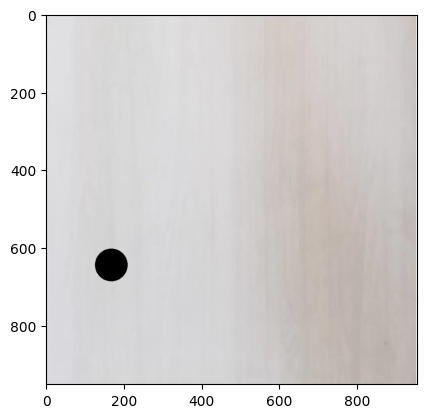

In [59]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Converting image to grayscale

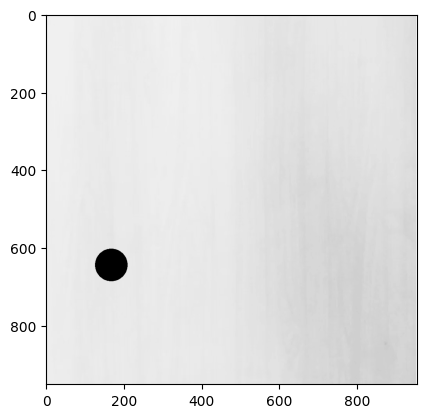

In [60]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')


In [61]:
gs.shape


(951, 954)

Smoothing image using Guassian filter of size (25,25)

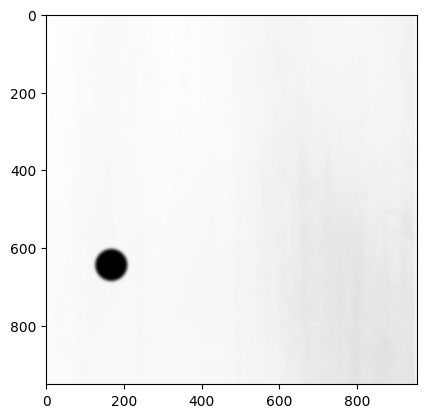

In [62]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

Adaptive image thresholding using Otsu's thresholding method

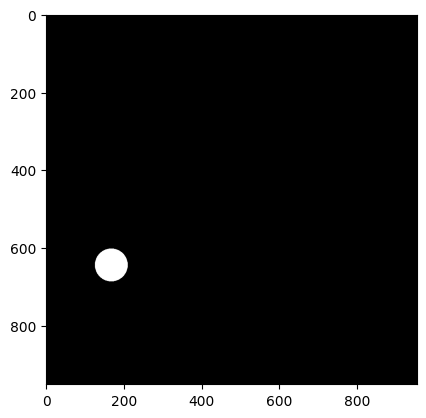

In [63]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

Closing of holes using Morphological Transformation
Performed so as to close any holes present in the leaf

In [64]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

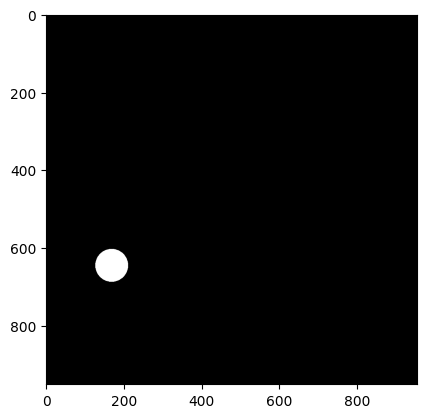

In [65]:
plt.imshow(closing,cmap='Greys_r')

Boundary extraction
Boundary extraction is needed which will be used in calculation of shape features.

Boundary extraction using sobel filters - Not effective
Trying to extract the boundary of the leaf using sobel filters. The image after edge extraction is thresholded using Otsu's method. Then the gaps were closed using Closing operation of Morphological Transformation.

This method is not effective as even after performing morphological transformation, gaps still persist.

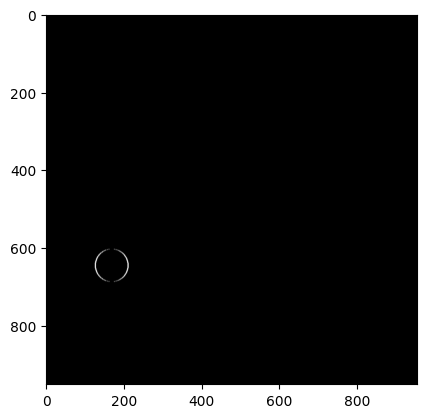

In [66]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.imshow(abs_sobel64f,cmap='Greys_r')

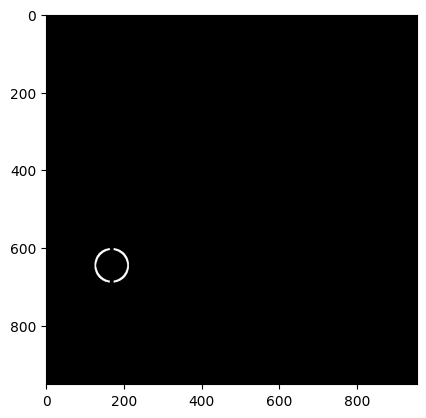

In [67]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
plt.imshow(im_bw_sobel,cmap='Greys_r')

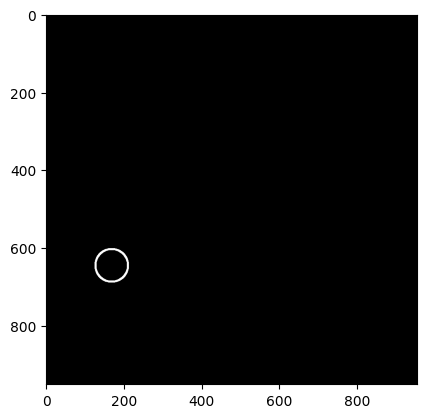

In [68]:
kernel_edge = np.ones((15,15),np.uint8)
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')

Boundary extraction using contours - Effective
Contours are used to extract leaf boundaries. They are continous, sharp and there are no gaps between the boundary pixels

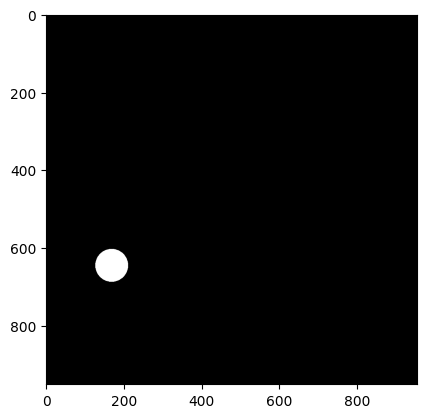

In [69]:
plt.imshow(closing,cmap="Greys_r")

In [71]:
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [72]:
len(contours)

1

In [73]:
cnt = contours[0]
len(cnt)

120

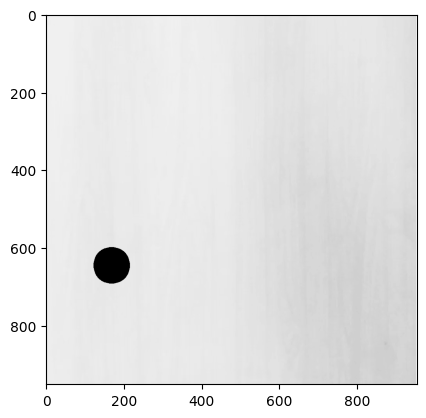

In [74]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

Morphological processing
1. Shape based features
Calculating moments using contours

In [75]:
M = cv2.moments(cnt)
M

{'m00': 5439.0,
 'm10': 916327.5,
 'm01': 3510874.5,
 'm20': 156729935.66666666,
 'm11': 591489401.25,
 'm02': 2268625127.0,
 'm30': 27197757356.75,
 'm21': 101169173472.83333,
 'm12': 382203198726.3333,
 'm03': 1467438647168.25,
 'mu20': 2353012.104201138,
 'mu11': 0.0,
 'mu02': 2355637.25,
 'mu30': 72208.29951095581,
 'mu21': 6.198883056640625e-06,
 'mu12': -72290.59856784344,
 'mu03': 0.0,
 'nu20': 0.07954008369281305,
 'nu11': 0.0,
 'nu02': 0.0796288228523671,
 'nu30': 3.3097064060042236e-05,
 'nu21': 2.8412915276479617e-15,
 'nu12': -3.313478627724357e-05,
 'nu03': 0.0}

In [76]:
area = cv2.contourArea(cnt)
area

5439.0

In [77]:
perimeter = cv2.arcLength(cnt,True)
perimeter

275.76449823379517

Fitting in the best-fit rectangle and ellipse
The best-fit rectangle is chosen and not ellipse as removes (leaves out) some portion at the extreme ends of the leaf image.

/var/folders/mm/dh_tfh090zsggp__3qhwmfb00000gn/T/ipykernel_1882/2719757872.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


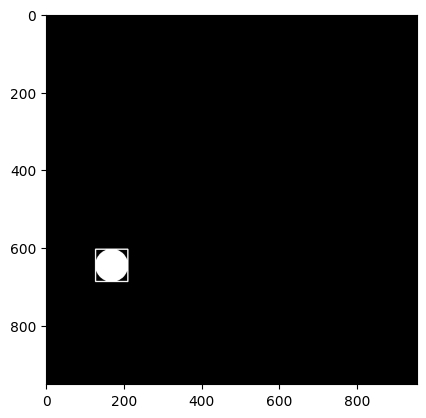

In [78]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

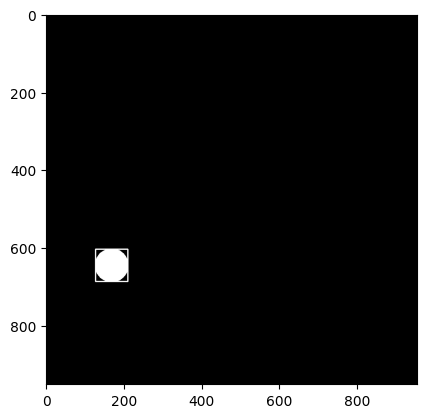

In [79]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

Shape based features calculated - Aspect ratio, rectangularity, circularity etc.

In [80]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.0

In [81]:
rectangularity = w*h/area
rectangularity

1.2972972972972974

In [82]:
circularity = ((perimeter)**2)/area
circularity

13.981625020433317

In [83]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

83.2174854451548

In [84]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

2. Color based features
Calculating color based features - mean, std-dev of the RGB channels

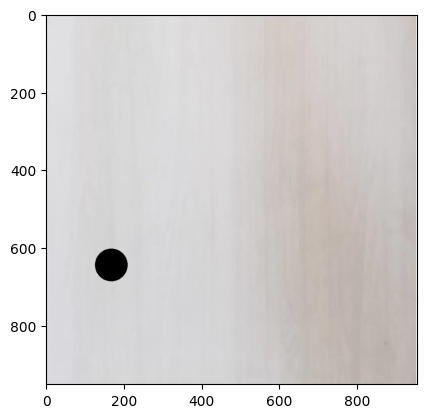

In [85]:
plt.imshow(img,cmap="Greys_r")

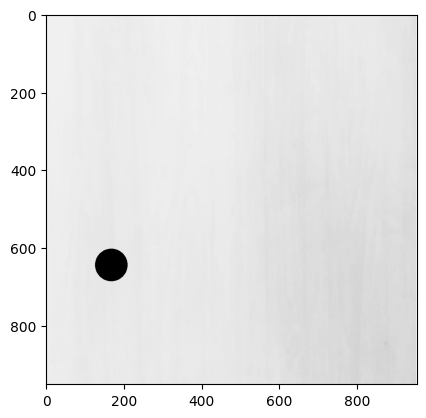

In [86]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

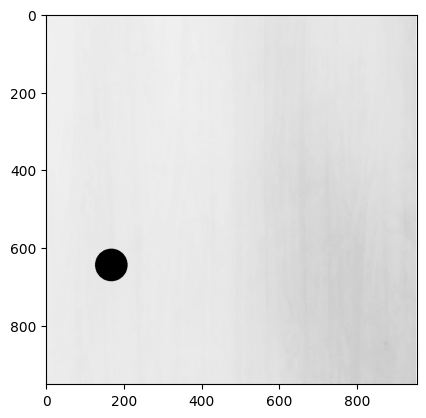

In [87]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

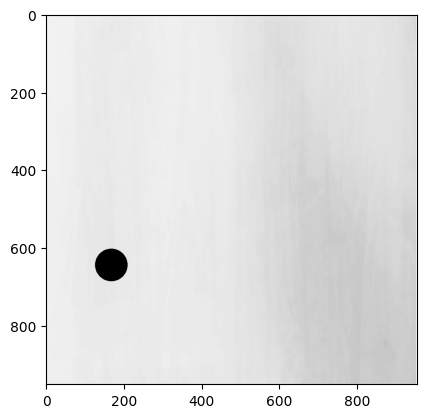

In [88]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [89]:
np.mean(blue_channel)

203.99172668293554

In [90]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [91]:
red_mean = np.mean(red_channel)
red_mean

208.09293758969375

In [92]:
green_mean = np.mean(green_channel)
green_mean

204.65744433201726

In [93]:
blue_mean = np.mean(blue_channel)
blue_mean

203.96924124886746

In [94]:
red_var = np.std(red_channel)
red_var

20.996682235931328

3. Texture based features
Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [97]:
import mahotas as mt

In [98]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 2.60276301e-02,  1.50635448e+01,  9.83795987e-01,  4.64888507e+02,
        8.93004772e-01,  4.11241114e+02,  1.84449048e+03,  5.76141127e+00,
        6.12402587e+00,  2.67345998e-03,  8.48358099e-01, -8.15757690e-01,
        9.99877911e-01])

In [99]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

15.063544767286166
0.9837959874565325
0.8930047715124865
6.124025869871916
